# Applied ML

In [ ]:
# Normal stack of pandas, numpy, matplotlib and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Statistical test library
import scipy.stats as stats
import random

from sklearn import preprocessing
import sklearn
print(sklearn.__file__)
print(sklearn.__version__)
print(sklearn.__path__)
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

%matplotlib inline

np.random.seed(10)
random.seed(10)

# Data pre-processing

In [2]:
# Load the dataset
original = pd.read_csv("CrowdstormingDataJuly1st.csv", parse_dates=['birthday'], infer_datetime_format=True)

In [3]:
original.describe()

//anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,height,weight,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,rater1,rater2,refNum,refCountry,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
count,145765.000000,143785.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,124621.000000,124621.000000,146028.000000,146028.000000,145865.000000,1.458650e+05,1.458650e+05,145865.000000,1.458650e+05,145865.000000
mean,181.935938,76.075662,2.921166,1.278344,0.708241,0.934581,0.338058,0.385364,0.011381,0.012559,0.264255,0.302862,1534.827444,29.642842,0.346276,1.969741e+04,6.310849e-04,0.452026,2.044023e+04,0.002994
std,6.738726,7.140906,3.413633,1.790725,1.116793,1.383059,0.906481,0.795333,0.107931,0.112889,0.295382,0.293020,918.736625,27.496189,0.032246,1.271262e+05,4.735857e-03,0.217469,1.306157e+05,0.019723
min,161.000000,54.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-0.047254,2.000000e+00,2.235373e-07,-1.375000,2.000000e+00,0.000001
25%,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,641.000000,7.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1604.000000,21.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,3.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,NaN,NaN,2345.000000,44.000000,NaN,NaN,NaN,NaN,NaN,NaN
max,203.000000,100.000000,47.000000,29.000000,14.000000,18.000000,23.000000,14.000000,3.000000,2.000000,1.000000,1.000000,3147.000000,161.000000,0.573793,1.975803e+06,2.862871e-01,1.800000,2.029548e+06,1.060660


In [4]:
# First glimpse at data content
original.ix[:5,:13]

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,ties,defeats,goals
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,1983-08-31,177.0,72.0,Attacking Midfielder,1,0,0,1,0
1,john-utaka,John Utaka,Montpellier HSC,France,1982-01-08,179.0,82.0,Right Winger,1,0,0,1,0
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,1992-12-17,181.0,79.0,NaN,1,0,1,0,0
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,1993-08-31,191.0,87.0,Center Back,1,1,0,0,0
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,1991-07-18,172.0,70.0,Right Midfielder,1,1,0,0,0
5,aaron-hughes,Aaron Hughes,Fulham FC,England,1979-11-08,182.0,71.0,Center Back,1,0,0,1,0


In [5]:
original.ix[:5,13:]

,yellowCards,yellowReds,redCards,photoID,rater1,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,0,0,0,95212.jpg,0.25,0.50,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,1,0,0,1663.jpg,0.75,0.75,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
2,1,0,0,NaN,NaN,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
3,0,0,0,NaN,NaN,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
4,0,0,0,NaN,NaN,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
5,0,0,0,3868.jpg,0.25,0.00,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752


Challenges in dataset:

- Skin ratings don't match -> take average
- Picture was missing -> exclude from training
- No cards drawn in some dyads


Prune dataset where there is no rater information

In [6]:
# Helper function to see the efect when we drop rows
def dropping_stats(df):
    drop_perc =  100 * (original.shape[0] - df.shape[0]) / original.shape[0]
    print("%.2f%% of original data droped." % (drop_perc) )
    
    print("Now: %d rows" % df.shape[0] )

# Initial cleaning


In [7]:
# Drop columns that will not be relevant for our model
original['year'] = original['birthday'].apply(lambda x: x.year)

#nan-dropping
data = original.dropna(how='any', subset=['rater1', 'rater2', 'meanExp', 'meanIAT'])
data.drop(['photoID', 'refCountry', 'Alpha_3', 'player', 'birthday'], errors='raise', axis=1, inplace=True)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [8]:
# If a referee is present in less than 22 triads (rows), he cannot have
# refereed a match in these leages.
ref_grouped = data[['refNum', 'games']].groupby(['refNum']).sum()
ref_filtered = ref_grouped[ref_grouped['games'] >= 22].reset_index()

# Therefore, we filter the data on this condition
has_referee = data[data['refNum'].isin(ref_filtered['refNum'].values)]
cleaned = has_referee
dropping_stats(cleaned)


20.21% of original data droped.
Now: 116522 rows


In [9]:
cleaned = cleaned[cleaned['meanIAT'].notnull()]

### Dealing with nan-values


In [10]:
cleaned['weight'].isnull().value_counts()

False    115874
True        648
Name: weight, dtype: int64

In [11]:
cleaned['height'].isnull().value_counts()

False    116499
True         23
Name: height, dtype: int64

In [12]:
cleaned['leagueCountry'].isnull().value_counts()

False    116522
Name: leagueCountry, dtype: int64

We will fill these with the mean value

In [13]:
cleaned['weight'].fillna(cleaned['weight'].mean(), inplace=True)
cleaned['height'].fillna(cleaned['height'].mean(), inplace=True)

In [14]:
print(cleaned['height'].hasnans)
print(cleaned['weight'].hasnans)

False
False


## Making the class feature

To make the class of the skin color of each player, we take the mean of the value from the two raters. 
Players that does not have a rating gets dropped.

In [15]:
def get_binary_class(x):
    """ Returns 0 for players rated below 0.5 ('light-skinned') and 1 for players rated above ('dark-skinned')"""
    if x <= 0.5:
        return 0
    else:
        return 1

In [16]:
# Take the mean of the two raters value
mean_rating = has_referee[['rater1', 'rater2']].mean(axis=1)

# Drop the players that does not have a rating
mean_rating.dropna(inplace=True)

dropping_stats(mean_rating)

20.21% of original data droped.
Now: 116522 rows


In [17]:
# The players now have a rating between 0 and 1, real numbers
mean_rating.head()

5    0.125
6    0.125
7    1.000
8    0.250
9    0.000
dtype: float64

In [18]:
# Since we want to do a binary classification, we convert the real numbers to 0/1

binary_class = mean_rating.apply(get_binary_class)
binary_class.name = 'class'
binary_class.head()

5    0
6    0
7    1
8    0
9    0
Name: class, dtype: int64

In [19]:
# Keep only the data rows where we have the class

has_class = has_referee.ix[binary_class.index]
dropping_stats(has_class)

20.21% of original data droped.
Now: 116522 rows


In [20]:
counts = binary_class.value_counts()
counts

0    98033
1    18489
Name: class, dtype: int64

In [21]:
print("%.2f%% of the examples are light skinned" % (counts[0] / (counts[0] + counts[1]) * 100))

84.13% of the examples are light skinned


Convert string values to floats by LabelEncoder to make them readable by the classifier

## Feature transformation

When we have categorical data, we need to transform them so that they can be taken into account in our model. One way of doing this is to use LabelEncoder and OneHotEncoder from SciKitLearn. 

LabelEncoder converts each category into an integer, so that we don't have to deal with strings. After doing this transformation, we use OneHotEncoder to make a binary feature for each category. This way, we can capture for instance wether a person has played for both Fulham FC and Manchester City. 

In [22]:
countries_encoded = pd.get_dummies(has_class['leagueCountry'])
countries_encoded.head()

,England,France,Germany,Spain
5,1.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0
9,0.0,0.0,1.0,0.0


In [23]:
position_encoded = pd.get_dummies(has_class['position'])
position_encoded.head()

,Attacking Midfielder,Center Back,Center Forward,Center Midfielder,Defensive Midfielder,Goalkeeper,Left Fullback,Left Midfielder,Left Winger,Right Fullback,Right Midfielder,Right Winger
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


We remove the original categorical features, and attatch the new one_hot_encoded ones :

### Feature combinations

In [24]:
# Our hypothesis is that the combination of the referees 'discrimination score' and cards given,
# might help us classify the players. E.g., if a player got many cards from racist referees, 
# he is more likely dark-skinned.

red_exp = has_class['redCards'] * has_class['meanExp'] 
yellow_exp = has_class['yellowCards'] * has_class['meanExp']
yellow_red_exp = has_class['yellowReds'] * has_class['meanExp']

red_iat = has_class['redCards'] * has_class['meanIAT'] 
yellow_iat = has_class['yellowCards'] * has_class['meanIAT']
yellow_red_iat = has_class['yellowReds'] * has_class['meanIAT']

cards_iat = pd.concat([red_exp, yellow_exp, yellow_red_exp, red_iat, yellow_iat, yellow_red_iat], axis=1)
cards_iat.columns = ['red_exp', 'yellow_exp', 'red_yellow_exp', 'red_iat', 'yellow_iat', 'red_yellow_iat']
cards_iat.head(10)

,red_exp,yellow_exp,red_yellow_exp,red_iat,yellow_iat,red_yellow_iat
5,0.0,0.000000,0.0,0.0,0.000000,0.0
6,0.0,0.000000,0.0,0.0,0.000000,0.0
7,0.0,0.000000,0.0,0.0,0.000000,0.0
8,0.0,0.000000,0.0,0.0,0.000000,0.0
9,0.0,0.000000,0.0,0.0,0.000000,0.0
10,0.0,0.538462,0.0,0.0,0.325185,0.0
11,0.0,0.000000,0.0,0.0,0.000000,0.0
12,0.0,0.000000,0.0,0.0,0.000000,0.0
13,0.0,0.000000,0.0,0.0,0.000000,0.0
14,0.0,0.000000,0.0,0.0,0.000000,0.0


### Combining the features

In [25]:
columns_from_orig = ['playerShort', 'year', 'height', 'weight', 'games', 'victories','ties', 'defeats','goals','yellowCards',
                     'yellowReds','redCards','meanIAT', 'nIAT', 'seIAT', 'meanExp', 'nExp', 'seExp']

colomns_one_hot_enoded = countries_encoded.columns | position_encoded.columns

features = has_class[columns_from_orig].join(countries_encoded).join(position_encoded).join(cards_iat).join(binary_class)
features.head()

,playerShort,year,height,weight,games,victories,ties,defeats,goals,yellowCards,...,Right Fullback,Right Midfielder,Right Winger,red_exp,yellow_exp,red_yellow_exp,red_iat,yellow_iat,red_yellow_iat,class
5,aaron-hughes,1979,182.0,71.0,1,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,aleksandar-kolarov,1985,187.0,80.0,1,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7,alexander-tettey,1986,180.0,68.0,1,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8,anders-lindegaard,1984,193.0,80.0,1,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,andreas-beck,1987,180.0,70.0,1,1,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [26]:
features.shape

(116522, 41)

### Aggregating over the players:

We now run grouping and aggregation of our dataframe. The aggregation functions used are defined in two dictionarys.
Each element of the dictionarys contains of a column name and an aggregation function, which is applied to our grouped features.

In [27]:
players = features.groupby(['playerShort','year','height', 'weight'])

# We sum over the one hot encoded features
one_hot_aggregation = {i: max for i in colomns_one_hot_enoded}

# And then sum over games, victories, ties, defeats, goals, cards, 
column_aggfunc_mapping = {'class': max, 'games': sum, 'victories': sum, 'ties': sum, 'defeats': sum, 'goals': sum,
                          'yellowCards': sum, 'yellowReds': sum, 'redCards': sum, 'red_exp': sum,
                          'yellow_exp': sum, 'red_yellow_exp': sum, 'red_iat': sum,
                          'yellow_iat': sum, 'red_yellow_iat': sum, 'meanIAT': np.mean, 'meanExp': np.mean}

# Union the aggregation function dicts
agg_funcs = {**one_hot_aggregation, **column_aggfunc_mapping}

agg_features = players.agg(agg_funcs)
agg_features = agg_features.reset_index().set_index('playerShort')
agg_features.head()

,year,height,weight,Spain,Center Back,red_exp,class,games,France,meanExp,...,England,ties,yellow_iat,yellowCards,Left Fullback,goals,Germany,Right Winger,Goalkeeper,Center Forward
playerShort,,,,,,,,,,,,,,,,,,,,,
aaron-hughes,1979,182.0,71.0,0.0,1.0,0.000000,0,646,0.0,0.489953,...,1.0,179,6.420221,19,0.0,8,0.0,0.0,0.0,0.0
aaron-hunt,1986,183.0,73.0,0.0,0.0,0.335967,0,335,0.0,0.450376,...,0.0,72,14.374395,42,0.0,62,1.0,0.0,0.0,0.0
aaron-lennon,1987,165.0,63.0,0.0,0.0,0.000000,0,412,0.0,0.491482,...,1.0,97,3.651979,11,0.0,31,0.0,0.0,0.0,0.0
aaron-ramsey,1990,178.0,76.0,0.0,0.0,0.336101,0,253,0.0,0.511374,...,1.0,42,10.462342,31,0.0,39,0.0,0.0,0.0,0.0
abdelhamid-el-kaoutari,1990,180.0,73.0,0.0,1.0,0.672202,0,124,1.0,0.335587,...,0.0,40,2.677471,8,0.0,1,0.0,0.0,0.0,0.0


## Normalizing

In [28]:
X = preprocessing.normalize(agg_features, norm='l2')
X

array([[  9.31490175e-01,   8.56650894e-02,   3.34187986e-02, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  9.75915974e-01,   8.99257921e-02,   3.58720373e-02, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  9.68075976e-01,   8.03887952e-02,   3.06939036e-02, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  9.69763896e-01,   8.91849565e-02,   3.72420698e-02, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  9.94426209e-01,   9.27262342e-02,   4.21027225e-02, ...,
          0.00000000e+00,   5.01222887e-04,   0.00000000e+00],
       [  9.90491233e-01,   9.27650400e-02,   3.89014684e-02, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

## Machine Learning by RandomForestClassifier

In [29]:
X = agg_features.drop('class', axis=1)
y = agg_features['class']

### Base model

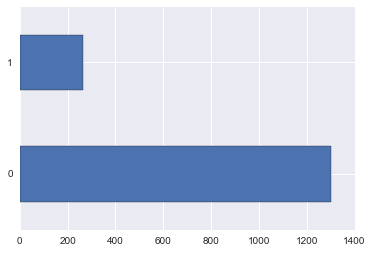

In [30]:
y.value_counts().plot(kind='barh', stacked=True)

In [31]:
print('There are about %.2f%% 0s in the class vector.' % (y.value_counts()[0] / y.shape[0]))

There are about 0.83% 0s in the class vector.


The result above shows that by allways predicting 0, we could achieve an accuracy of approximately 60%. 
We should therefore expect that our classifier performs at least as good as this, and hopefully significantly better. 

### Tuning the model

In [32]:
rfc = RandomForestClassifier(n_jobs=-1, n_estimators=10, random_state=42) 

param_grid = {
    'max_features': ['log2','sqrt', None],
    'min_samples_leaf': [2,20,200],
    'max_depth': [4,8,16,None],
}

#(8)    'max_depth': [4,8,16,None],
#(gini) 'criterion': ['gini', 'entropy'],
#(log2) 'max_features': ['log2','sqrt', None],
#(20) 'min_samples_split': [2,20,200],
#(2) 'min_samples_leaf': [2,20,200],
#(20) 'min_samples_split': [2,20,200],
#(1e-7) 'min_impurity_split': [1e-07, 1e-06, 1e-05],
#(True) 'bootstrap': [True, False],

#### Optimizing for F1 score

In [33]:
CV_rfc = GridSearchCV(estimator=rfc, scoring='f1', param_grid=param_grid, cv=10, verbose=True, n_jobs=-1)
CV_rfc.fit(X, y)
print(CV_rfc.best_params_)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


//anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-sco

{'max_depth': None, 'min_samples_leaf': 2, 'max_features': None}


[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   10.6s finished


#### Optimizing for accuracy

In [34]:
CV_rfc = GridSearchCV(estimator=rfc, scoring='accuracy', param_grid=param_grid, cv=10, verbose=True, n_jobs=-1)
CV_rfc.fit(X, y, )
print(CV_rfc.best_params_)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    5.4s


{'max_depth': 4, 'min_samples_leaf': 2, 'max_features': 'log2'}


[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   10.5s finished


### Training the model

We use the results found in the grid search to tune our random forrest classifier. 

Description of the hyperparameters:

- n_estimators: The number of trees used in random forest
- min_samples_leaf: TODO
- max_features: TODO
- max_depth: The maximal depth of the tree

- bootstrap: Todo
- oob_score: Todo
- n_jobs: Number of processes used in the calculation. -1 uses all avilable.
- random_state: Seed for the random generator, to give reproducable results.

In [35]:
rfc = RandomForestClassifier(n_estimators=500, min_samples_leaf=2, max_features='log2', max_depth=None, random_state=4, n_jobs=-1)
print(rfc)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=False, random_state=4,
            verbose=0, warm_start=False)


We can then fit our model to the data:

In [36]:
rfc.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=False, random_state=4,
            verbose=0, warm_start=False)

## Inspect most relevant features of RandomForest

Feature ranking:
1. feature 8 : meanExp  (0.100436)
2. feature 16 : meanIAT  (0.094825)
3. feature 20 : victories  (0.058331)
4. feature 30 : goals  (0.054431)
5. feature 6 : games  (0.053175)
6. feature 23 : defeats  (0.052443)
7. feature 27 : yellow_iat  (0.051749)
8. feature 24 : yellow_exp  (0.051114)
9. feature 26 : ties  (0.048109)
10. feature 2 : weight  (0.047726)
11. feature 28 : yellowCards  (0.043151)
12. feature 1 : height  (0.040900)
13. feature 7 : France  (0.040131)
14. feature 0 : year  (0.039653)
15. feature 17 : red_yellow_exp  (0.027292)
16. feature 5 : red_exp  (0.026916)
17. feature 22 : red_iat  (0.023785)
18. feature 21 : red_yellow_iat  (0.023423)
19. feature 31 : Germany  (0.020458)
20. feature 18 : redCards  (0.013542)
21. feature 3 : Spain  (0.012682)
22. feature 10 : yellowReds  (0.012366)
23. feature 34 : Center Forward  (0.012303)
24. feature 25 : England  (0.009973)
25. feature 33 : Goalkeeper  (0.007328)
26. feature 19 : Defensive Midfielder  (0.005228)


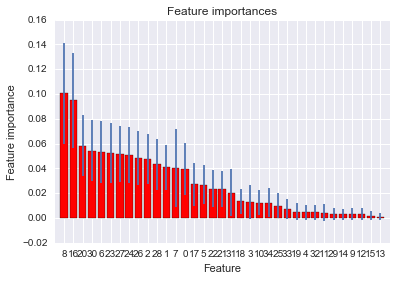

In [37]:
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d : %s  (%f)" % (f + 1, indices[f], X.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.xlabel("Feature")
plt.ylabel("Feature importance")
plt.show()

## Performance assessment 

### Cross-validation

In [38]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
scores = cross_val_score(rfc, X, y, cv=10, scoring='accuracy', n_jobs=-1)
print(scores)
print('Achieved model score: ', np.mean(scores))

[ 0.82165605  0.85350318  0.8343949   0.82692308  0.8525641   0.83974359
  0.84615385  0.85897436  0.8525641   0.83333333]
Achieved model score:  0.841981055038


Visualize score results as boxplots

{'boxes': [<matplotlib.lines.Line2D at 0x11ca4c630>],
 'caps': [<matplotlib.lines.Line2D at 0x11a4dbb00>,
 'fliers': [<matplotlib.lines.Line2D at 0x1277b0ef0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11ca49390>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11ca4c358>,
  <matplotlib.lines.Line2D at 0x11a4dbcf8>]}

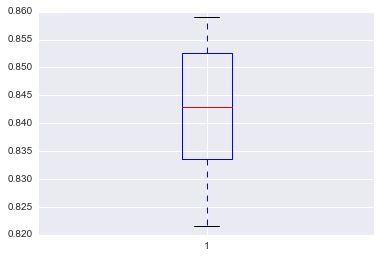

In [39]:
plt.boxplot(scores)

### Confusion matrix

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1250, 35) (313, 35) (1250,) (313,)


In [41]:
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.89      0.99      0.93       274
          1       0.56      0.13      0.21        39

avg / total       0.85      0.88      0.84       313



Visualize confusion matrix

//anaconda/lib/python3.5/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


Confusion matrix, without normalization
[[1296    4]
 [  66  197]]


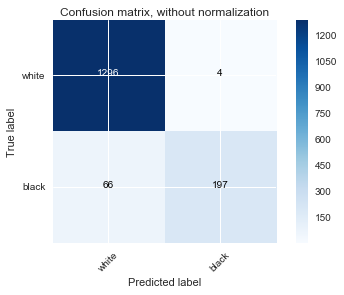

In [42]:
from plot_helpers import custom_confusion_matrix
from sklearn.metrics import confusion_matrix

y_true = y
y_pred = rfc.predict(X)

cm = confusion_matrix(y_true, y_pred)

custom_confusion_matrix(cm, classes=['white','black'], title='Confusion matrix, without normalization')

Normalized confusion matrix
[[ 0.99692308  0.00307692]
 [ 0.25095057  0.74904943]]


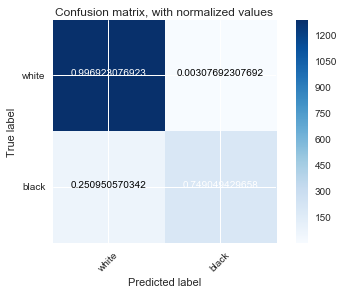

In [43]:
custom_confusion_matrix(cm, classes=['white','black'], normalize=True, title='Confusion matrix, with normalized values')

## Statistical significance of result

Here we test the distribution of the achieved learning score against the learning score value achieved by a simple DummyClassifier to see if our model actually performs significantly better.

In [44]:
from scipy.stats import ttest_1samp
dummy_ratio = 0.83
t,p_value = ttest_1samp(scores, dummy_ratio, axis=0)
p_value

0.015075072758330988

Since the p-value is below 0.05 we don't reject the null hypothesis which is the assumption that the mean of the random sample consisting of the results of our crossvalidation is equal to true mean, consisting of the dummy classifier ratio. This concludes that our models performance is not significantly better than the datasets random level class ratio.

# Bonus: Learning curve


In [45]:
#train_sizes = np.arange(300,1201, int((1201-300)/20))
train_sizes = np.arange(0.1, 1.0, 0.8/3)
train_sizes.shape

(4,)

In [46]:


rfc = RandomForestClassifier(
    n_estimators=1000, min_samples_leaf=2, max_features='log2', max_depth=8,
    bootstrap=True, oob_score=True, random_state=4, n_jobs=-1)

train_sizes, train_scores, test_scores = learning_curve(
     rfc, X, y, train_sizes=train_sizes, cv=10, n_jobs=-1)

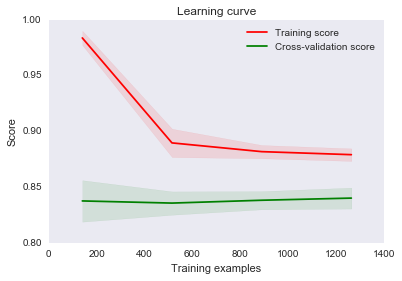

In [47]:
plt.figure()
plt.title("Learning curve")

plt.xlabel("Training examples")
plt.ylabel("Score")

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, '-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, '-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")

### Club skin-color rate

In [48]:
# TODO: is this cheating?
club_class = pd.concat([has_class['club'], binary_class], axis=1)
club_class_mean = club_class.groupby('club').mean()
club_class_mean.columns = ['club_class_mean']
club_class_mean.head()

,club_class_mean
club,
1. FC Nürnberg,0.000000
1. FSV Mainz 05,0.082734
1899 Hoffenheim,0.000000
AC Ajaccio,0.202212
AS Nancy,0.399194


In [49]:
club_stats = pd.DataFrame(has_class['club']).merge(club_class_mean, left_on='club', right_index=True, how='left')
club_stats.head()

,club,club_class_mean
5,Fulham FC,0.093190
6,Manchester City,0.263057
7,Norwich City,0.418152
8,Manchester United,0.219795
9,1899 Hoffenheim,0.000000


In [50]:
plt.savefig("Learning_curve")

# Applied ML

In [51]:
# Normal stack of pandas, numpy, matplotlib and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

import plot_helpers

# Statistical test library
import scipy.stats as stats

%matplotlib inline

# Data pre-processing

In [52]:
# Load the dataset
original = pd.read_csv("CrowdstormingDataJuly1st.csv", parse_dates=['birthday'], infer_datetime_format=True)

In [53]:
original.describe()

//anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,height,weight,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,rater1,rater2,refNum,refCountry,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
count,145765.000000,143785.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,124621.000000,124621.000000,146028.000000,146028.000000,145865.000000,1.458650e+05,1.458650e+05,145865.000000,1.458650e+05,145865.000000
mean,181.935938,76.075662,2.921166,1.278344,0.708241,0.934581,0.338058,0.385364,0.011381,0.012559,0.264255,0.302862,1534.827444,29.642842,0.346276,1.969741e+04,6.310849e-04,0.452026,2.044023e+04,0.002994
std,6.738726,7.140906,3.413633,1.790725,1.116793,1.383059,0.906481,0.795333,0.107931,0.112889,0.295382,0.293020,918.736625,27.496189,0.032246,1.271262e+05,4.735857e-03,0.217469,1.306157e+05,0.019723
min,161.000000,54.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-0.047254,2.000000e+00,2.235373e-07,-1.375000,2.000000e+00,0.000001
25%,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,641.000000,7.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1604.000000,21.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,3.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,NaN,NaN,2345.000000,44.000000,NaN,NaN,NaN,NaN,NaN,NaN
max,203.000000,100.000000,47.000000,29.000000,14.000000,18.000000,23.000000,14.000000,3.000000,2.000000,1.000000,1.000000,3147.000000,161.000000,0.573793,1.975803e+06,2.862871e-01,1.800000,2.029548e+06,1.060660


In [54]:
from pandas.tools.plotting import scatter_matrix

#scatter_matrix(original, figsize=(30, 30), diagonal='histogram')

In [55]:
# First glimpse at data content
original.ix[:10,:13]

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,ties,defeats,goals
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,1983-08-31,177.0,72.0,Attacking Midfielder,1,0,0,1,0
1,john-utaka,John Utaka,Montpellier HSC,France,1982-01-08,179.0,82.0,Right Winger,1,0,0,1,0
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,1992-12-17,181.0,79.0,NaN,1,0,1,0,0
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,1993-08-31,191.0,87.0,Center Back,1,1,0,0,0
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,1991-07-18,172.0,70.0,Right Midfielder,1,1,0,0,0
5,aaron-hughes,Aaron Hughes,Fulham FC,England,1979-11-08,182.0,71.0,Center Back,1,0,0,1,0
6,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,1985-11-10,187.0,80.0,Left Fullback,1,1,0,0,0
7,alexander-tettey,Alexander Tettey,Norwich City,England,1986-04-04,180.0,68.0,Defensive Midfielder,1,0,0,1,0
8,anders-lindegaard,Anders Lindegaard,Manchester United,England,1984-04-13,193.0,80.0,Goalkeeper,1,0,1,0,0
9,andreas-beck,Andreas Beck,1899 Hoffenheim,Germany,1987-03-13,180.0,70.0,Right Fullback,1,1,0,0,0


Challenges in dataset:

- Skin ratings don't match -> take average
- Picture was missing -> exclude from training
- No cards drawn in some dyads


Prune dataset where there is no rater information

# Initial cleaning


In [56]:
grouped = original[['refNum', 'games']].groupby(['refNum']).sum()
grouped_df = grouped[grouped['games'] >= 22].reset_index()

In [57]:
referees_df = original[original['refNum'].isin(grouped_df['refNum'].values)]

In [58]:
# Function to round on quater ratings
def round_quarter(x):
    return round(x*4)/4

def binary_class(x):
    return round(x*2)/2

In [59]:
rater = referees_df.copy()
#rater['rater_mean'] = round_quarter(rater[['rater1','rater2']].mean(axis=1))
rater['rater_mean'] = binary_class(rater[['rater1','rater2']].mean(axis=1))
rater['rater_mean'].head()

5    0.0
6    0.0
7    1.0
8    0.0
9    0.0
Name: rater_mean, dtype: float64

In [60]:
rater = rater.dropna(subset=['rater_mean'])
rater['rater_mean'].head()

5    0.0
6    0.0
7    1.0
8    0.0
9    0.0
Name: rater_mean, dtype: float64

Get rid of unusable columns

In [61]:
# rater.columns[:16] | rater.columns[20:] - ['Alpha_3']

In [62]:
rater.columns


Index(['playerShort', 'player', 'club', 'leagueCountry', 'birthday', 'height',
       'weight', 'position', 'games', 'victories', 'ties', 'defeats', 'goals',
       'yellowCards', 'yellowReds', 'redCards', 'photoID', 'rater1', 'rater2',
       'refNum', 'refCountry', 'Alpha_3', 'meanIAT', 'nIAT', 'seIAT',
       'meanExp', 'nExp', 'seExp', 'rater_mean'],
      dtype='object')

In [63]:
features = rater

# Take only the features that describes the player
# Feature 1 contains the short name of the player
# Feature 16 and upwards contains the information about the rater

#TODO: add referee columns
features = features.reset_index(drop=True)
# features = rater[ rater.columns[:16] | ['rater_mean']]
features.head()

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp,rater_mean
0,aaron-hughes,Aaron Hughes,Fulham FC,England,1979-11-08,182.0,71.0,Center Back,1,0,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.0
1,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,1985-11-10,187.0,80.0,Left Fullback,1,1,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.0
2,alexander-tettey,Alexander Tettey,Norwich City,England,1986-04-04,180.0,68.0,Defensive Midfielder,1,0,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,1.0
3,anders-lindegaard,Anders Lindegaard,Manchester United,England,1984-04-13,193.0,80.0,Goalkeeper,1,0,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.0
4,andreas-beck,Andreas Beck,1899 Hoffenheim,Germany,1987-03-13,180.0,70.0,Right Fullback,1,1,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,0.0


In [64]:
features.shape

(117579, 29)

Convert string values to floats by LabelEncoder to make them readable by the classifier

In [65]:
features['refNum'].unique().shape

(1261,)

In [66]:
original_features = features.copy()

In [67]:
# Split birthday into year...
# features_t = features[features['birthday'].str.split('-')]
# features_t

In [68]:


# Workaround by removing problematic columns
#features = features.drop('position', axis=1)
#features = features.drop('Alpha_3', axis=1)
#features.head()


## Feature transformation

When we have categorical data, we need to transform them so that they can be taken into account in our model. One way of doing this is to use LabelEncoder and OneHotEncoder from SciKitLearn. 

LabelEncoder converts each category into an integer, so that we don't have to deal with strings. After doing this transformation, we use OneHotEncoder to make a binary feature for each category. This way, we can capture for instance wether a person has played for both Fulham FC and Manchester City. 

In [69]:
# We select those features that contains some categorical value
# At the same time, we fill the NaN-values by '' to avoid problems later on
categorical_features = features[['leagueCountry','position','club']].fillna('Missing')


columns = []
for cat in categorical_features.columns:
    counts = categorical_features[cat].value_counts()
    n_cats = len(counts)
    
    columns += list(counts.keys().values)

    print("%s (%i categories):" % (cat.capitalize(), n_cats))
    print("%s\n" % counts[:10])

Leaguecountry (4 categories):
Germany    36197
England    33738
Spain      29579
France     18065
Name: leagueCountry, dtype: int64

Position (13 categories):
Center Back             19531
Center Forward          15629
Defensive Midfielder    13307
Goalkeeper              10317
Attacking Midfielder    10126
Left Fullback            8465
Right Fullback           8022
Missing                  7933
Left Midfielder          5951
Right Winger             4878
Name: position, dtype: int64

Club (96 categories):
FC Barcelona           2681
Paris Saint-Germain    2668
Manchester City        2618
Bayern München         2609
VfL Wolfsburg          2574
Arsenal FC             2547
Fulham FC              2543
Tottenham Hotspur      2495
Real Madrid            2475
VfB Stuttgart          2378
Name: club, dtype: int64



In [70]:
# Our categorical_features now looks like this:
categorical_features.head()

,leagueCountry,position,club
0,England,Center Back,Fulham FC
1,England,Left Fullback,Manchester City
2,England,Defensive Midfielder,Norwich City
3,England,Goalkeeper,Manchester United
4,Germany,Right Fullback,1899 Hoffenheim


In [71]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Step 1: Transform each category into an integer
## For this, we use LabelEncoder from sklearn

label_encoded = categorical_features.apply(LabelEncoder().fit_transform)
label_encoded.head()

,leagueCountry,position,club
0,0,1,34
1,0,6,48
2,0,4,54
3,0,5,49
4,2,10,2


In [72]:
# Step 2: Transform each integer into a binary feature
## For this, we use OneHotEncoder

one_hot_encoded = OneHotEncoder().fit_transform(label_encoded).toarray()

one_hot_encoded_features = pd.DataFrame(one_hot_encoded, columns=columns)

one_hot_encoded_features



,Germany,England,Spain,France,Center Back,Center Forward,Defensive Midfielder,Goalkeeper,Attacking Midfielder,Left Fullback,...,Liverpool FC (R),Bristol City,Real Madrid Castilla,Crewe Alexandra,Leicester City,Real Jaén,Leyton Orient,Arsenal FC (R),US Boulogne,CF Badalona
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


We remove the original categorical features, and attatch the new one_hot_encoded ones :

In [73]:
features_no_categorical = features.drop( categorical_features.columns, axis=1)
features_no_categorical.shape


(117579, 26)

In [74]:
features_one_hot_encoded = features_no_categorical.join(one_hot_encoded_features)
features_one_hot_encoded

,playerShort,player,birthday,height,weight,games,victories,ties,defeats,goals,...,Liverpool FC (R),Bristol City,Real Madrid Castilla,Crewe Alexandra,Leicester City,Real Jaén,Leyton Orient,Arsenal FC (R),US Boulogne,CF Badalona
0,aaron-hughes,Aaron Hughes,1979-11-08,182.0,71.0,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,aleksandar-kolarov,Aleksandar Kolarov,1985-11-10,187.0,80.0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,alexander-tettey,Alexander Tettey,1986-04-04,180.0,68.0,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,anders-lindegaard,Anders Lindegaard,1984-04-13,193.0,80.0,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,andreas-beck,Andreas Beck,1987-03-13,180.0,70.0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,antonio-rukavina,Antonio Rukavina,1984-01-26,177.0,74.0,2,2,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,ashkan-dejagah,Ashkan Dejagah,1986-07-05,181.0,74.0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,benedikt-hoewedes,Benedikt Höwedes,1988-02-29,187.0,80.0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,chris-baird,Chris Baird,1982-02-25,186.0,77.0,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,chris-brunt,Chris Brunt,1984-12-14,185.0,74.0,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Feature combinations

In [75]:
cards = features_one_hot_encoded[['redCards', 'yellowCards', 'yellowReds']]

iat = pd.DataFrame(cards.sum(axis=1) * features_one_hot_encoded['meanIAT'], columns=['IAT_comb'])
features_one_hot_encoded.join(iat, rsuffix="IAT_comb")

,playerShort,player,birthday,height,weight,games,victories,ties,defeats,goals,...,Bristol City,Real Madrid Castilla,Crewe Alexandra,Leicester City,Real Jaén,Leyton Orient,Arsenal FC (R),US Boulogne,CF Badalona,IAT_comb
0,aaron-hughes,Aaron Hughes,1979-11-08,182.0,71.0,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,aleksandar-kolarov,Aleksandar Kolarov,1985-11-10,187.0,80.0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,alexander-tettey,Alexander Tettey,1986-04-04,180.0,68.0,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,anders-lindegaard,Anders Lindegaard,1984-04-13,193.0,80.0,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,andreas-beck,Andreas Beck,1987-03-13,180.0,70.0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
5,antonio-rukavina,Antonio Rukavina,1984-01-26,177.0,74.0,2,2,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.325185
6,ashkan-dejagah,Ashkan Dejagah,1986-07-05,181.0,74.0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
7,benedikt-hoewedes,Benedikt Höwedes,1988-02-29,187.0,80.0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
8,chris-baird,Chris Baird,1982-02-25,186.0,77.0,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
9,chris-brunt,Chris Brunt,1984-12-14,185.0,74.0,1,0,0,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000


In [76]:
meanIAT = features_one_hot_encoded['meanIAT']
combIAT = pd.DataFrame(cards.sum(axis=1) * meanIAT, columns=['combIAT'])

features_with_gen = features_one_hot_encoded.join(combIAT)

### Aggregating over the players:

We now run grouping and aggregation of our dataframe. The aggregation functions used are defined in two dictionarys.
Each element of the dictionarys contains of a column name and an aggregation function, which is applied to our grouped features.

In [77]:
grouped_features = features_with_gen.groupby(['playerShort', 'birthday', 'height', 'weight'])

# Aggregating with max gives us a logical OR on the one hot encoded features
one_hot_enc_aggfunc_mapping = {i: max for i in one_hot_encoded_features.columns}
column_aggfunc_mapping = {'rater_mean': max,'games': sum, 'victories': sum, 'ties': sum, 'defeats': sum, 'goals': sum, 'yellowCards': sum, 'yellowReds': sum, 'redCards': sum, 'meanIAT': np.mean, 'nIAT': np.mean, 'meanExp': np.mean, 'nExp': np.mean, 'combIAT': sum}

aggregated_features = grouped_features.agg({**one_hot_enc_aggfunc_mapping, **column_aggfunc_mapping})
aggregated_features = aggregated_features.reset_index().set_index('playerShort')
aggregated_features.head()

,birthday,height,weight,Spain,Newcastle United,games,Everton FC,Arsenal FC,SV Sandhausen,West Ham United,...,Atlético Madrid,Stoke City,Real Sociedad,Stade Reims,Real Betis,goals,Germany,Bayern München,Borussia Dortmund,Real Madrid Castilla
playerShort,,,,,,,,,,,,,,,,,,,,,
aaron-hughes,1979-11-08,182.0,71.0,0.0,0.0,650,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9,1.0,0.0,0.0,0.0
aaron-hunt,1986-09-04,183.0,73.0,1.0,0.0,335,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,62,0.0,0.0,0.0,0.0
aaron-lennon,1987-04-16,165.0,63.0,0.0,0.0,412,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,31,1.0,0.0,0.0,0.0
aaron-ramsey,1990-12-26,178.0,76.0,0.0,0.0,254,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,39,1.0,0.0,0.0,0.0
abdelhamid-el-kaoutari,1990-03-17,180.0,73.0,0.0,0.0,124,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0


Prepared dataset for further processing with ML methods

In [78]:
from sklearn import preprocessing


X_lab = aggregated_features.apply(LabelEncoder().fit_transform)

Xy = X_lab

In [79]:
X_train = Xy.drop(['rater_mean'], axis=1)
Y_train = Xy['rater_mean']
#Y_train = np.asarray(rater['rater_mean'], dtype="|S6")
X_train = X_train.tail(-3)
Y_train = Y_train[3:]
print(type(Y_train))
print(X_train.shape)
print(Y_train.shape)
print('FEATURES')
print(X_train.head(10))
print('LABELS')
print(Y_train)

<class 'pandas.core.series.Series'>
(1560, 129)
(1560,)
FEATURES
                        birthday  height  weight  Spain  Newcastle United  \
playerShort                                                                 
aaron-ramsey                1138      17      21      0                 0   
abdelhamid-el-kaoutari      1074      19      18      0                 0   
abdou-traore_2               861      19      19      0                 0   
abdoulaye-diallo_2          1239      28      25      0                 0   
abdoulaye-keita_2           1118      27      28      0                 0   
abdoulwhaid-sissoko         1075      19      13      0                 0   
abdul-rahman-baba           1357      18      15      1                 0   
abdul-razak                 1275      19      23      0                 0   
abel-aguilar                 533      24      23      0                 0   
abelaziz-barrada            1007      24      23      0                 0   

          

## Normalizing

In [80]:

X_train = preprocessing.normalize(X_train, norm='l2')
X_train

array([[ 0.43433795,  0.00648835,  0.00801502, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.93942296,  0.01661921,  0.01574452, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.83896254,  0.01851369,  0.01851369, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.04484538,  0.01095062,  0.01095062, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.22931188,  0.01212221,  0.01464768, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.33863818,  0.01207697,  0.01111081, ...,  0.        ,
         0.        ,  0.        ]])

## Machine Learning by RandomForestClassifier

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
rfc = RandomForestClassifier(verbose=1, min_samples_split=2, oob_score=True)
print(rfc)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=True, random_state=None,
            verbose=1, warm_start=False)


### Test classifier

In [83]:
# import test data set to test classifier
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [84]:
rfc.fit(X, y)

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
//anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=True, random_state=None,
            verbose=1, warm_start=False)

In [85]:
# test prediction
X_pred = [[3, 5, 4, 2], [5, 4, 3, 2]]
rfc.predict(X_pred)

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


array([1, 1])

### Use classifier with live data

In [86]:
# Plug of unplug live data
X = X_train
y = Y_train

In [87]:
rfc.fit(X, y)

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
//anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=True, random_state=None,
            verbose=1, warm_start=False)

In [88]:
# manual prediction test
#X_pred = features.head(3)
#rfc.predict(X_pred)

## Inspect most relevant features of RandomForest

Feature ranking:
1. feature 0 (0.056038)
2. feature 34 (0.051087)
3. feature 40 (0.049055)
4. feature 2 (0.047469)
5. feature 42 (0.047021)
6. feature 124 (0.045232)
7. feature 17 (0.042502)
8. feature 64 (0.042156)
9. feature 5 (0.041629)
10. feature 112 (0.035460)
11. feature 83 (0.033744)
12. feature 81 (0.032847)
13. feature 1 (0.032767)
14. feature 117 (0.031571)
15. feature 46 (0.030638)
16. feature 116 (0.027986)
17. feature 47 (0.023409)
18. feature 125 (0.020206)
19. feature 3 (0.017755)
20. feature 103 (0.016370)
21. feature 96 (0.015886)
22. feature 91 (0.013132)
23. feature 56 (0.011368)
24. feature 37 (0.010875)
25. feature 10 (0.010445)
26. feature 23 (0.009042)
27. feature 70 (0.007295)
28. feature 102 (0.007222)
29. feature 12 (0.006723)
30. feature 100 (0.006374)
31. feature 49 (0.006171)
32. feature 15 (0.006108)
33. feature 60 (0.006077)
34. feature 16 (0.005181)
35. feature 41 (0.005111)
36. feature 39 (0.004935)
37. feature 89 (0.004831)
38. feature 59 (0.004634)
3

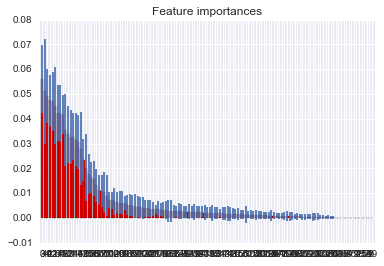

In [89]:
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

## Performance assessment through cross-validation

In [90]:
from sklearn.cross_validation import cross_val_score
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
scores = cross_val_score(rfc, X, y, cv=50, scoring='accuracy')
print(scores)
print('Achieved model score: ', np.mean(scores))

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
//anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
//anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
//anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few tree

[ 0.72727273  0.75757576  0.63636364  0.6969697   0.6969697   0.65625     0.75
  0.71875     0.6875      0.6875      0.6875      0.6875      0.625       0.6875
  0.59375     0.6875      0.65625     0.65625     0.71875     0.6875
  0.71875     0.59375     0.6875      0.6875      0.6875      0.77419355
  0.80645161  0.70967742  0.74193548  0.67741935  0.73333333  0.7         0.7
  0.73333333  0.76666667  0.76666667  0.76666667  0.76666667  0.73333333
  0.76666667  0.7         0.7         0.73333333  0.73333333  0.73333333
  0.8         0.73333333  0.73333333  0.66666667  0.73333333]
Achieved model score:  0.70974657869


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
//anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
//anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
//anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few tree

Visualize score results as boxplots

{'boxes': [<matplotlib.lines.Line2D at 0x1271b67f0>],
 'caps': [<matplotlib.lines.Line2D at 0x1271c47f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x12718f978>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x127198668>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1271b6f60>,
  <matplotlib.lines.Line2D at 0x1271b6c18>]}

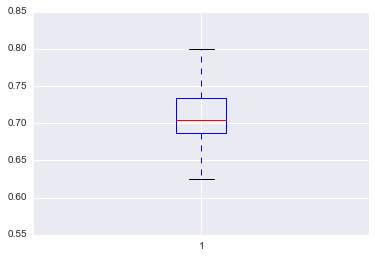

In [91]:
plt.boxplot(scores)

## Exercise 2


For the aggregation the referee information grouping by soccer player we use original features only, since it was not specified in the homework description whether or not we should use our base features alongside engineered ones.

Moreover using base features for clustering is a little easier to comprehend and explain.

### Aggregate the referee information grouping by soccer player

In [92]:
#Group by soccer player
grouped_features = original_features.groupby(['playerShort', 'birthday', 'height', 'weight'])
grouped_features.first()

#Aggregate referee information
column_aggfunc_mapping = {'rater_mean': max,'games': sum, 'victories': sum, 'ties': sum, \
                          'defeats': sum, 'goals': sum, 'yellowCards': sum, 'yellowReds': sum, \
                          'redCards': sum, 'meanIAT': np.mean, 'nIAT': np.mean, 'meanExp': np.mean, \
                          'nExp': np.mean}

aggregated_features = grouped_features.agg( column_aggfunc_mapping ) \
                            .reset_index() \
                            .set_index('playerShort')

#Convert birthday date column to seperate year, month and day columns
aggregated_features['year'] = aggregated_features['birthday'].dt.year
aggregated_features['month'] = aggregated_features['birthday'].dt.month
aggregated_features['day'] = aggregated_features['birthday'].dt.day

aggregated_features = aggregated_features.drop(['birthday'], axis=1)
aggregated_features.head()

,height,weight,redCards,rater_mean,victories,games,meanExp,defeats,nExp,ties,yellowReds,yellowCards,goals,meanIAT,nIAT,year,month,day
playerShort,,,,,,,,,,,,,,,,,,
aaron-hughes,182.0,71.0,0,0.0,246,650,0.489007,225,21143.635802,179,0,19,9,0.344413,20193.709877,1979,11,8
aaron-hunt,183.0,73.0,1,0.0,141,335,0.450376,122,27057.214286,72,0,42,62,0.348943,26291.591837,1986,9,4
aaron-lennon,165.0,63.0,0,0.0,200,412,0.491482,115,22238.742574,97,0,11,31,0.345893,21234.861386,1987,4,16
aaron-ramsey,178.0,76.0,1,0.0,145,254,0.511650,67,42088.153061,42,0,31,39,0.346790,40568.571429,1990,12,26
abdelhamid-el-kaoutari,180.0,73.0,2,0.0,41,124,0.335587,43,2953.837838,40,4,8,1,0.331600,2832.351351,1990,3,17


Since we want to have only two disjoint clusters lets use kMeans

In [93]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

Y_true = aggregated_features['rater_mean'].round().as_matrix() #We want binary classification / two distinct clusters
X = aggregated_features.drop(['rater_mean'], axis=1)
X = X.apply(LabelEncoder().fit_transform)
X_scaled = preprocessing.scale(X, axis=1)
X_copy = X.copy()

kmeans = KMeans(n_clusters=2, random_state=0, n_jobs=-2, init='k-means++').fit(X_scaled)
Y_pred = kmeans.labels_

For binary classification, the count of true negatives is C_{0,0}, false negatives is C_{1,0}, true positives is C_{1,1} and false positives is C_{0,1}.

Our baseline KMeans clustering with 2 clusters and all features:

Confusion matrix, without normalization
[[530 803]
 [ 73 157]]


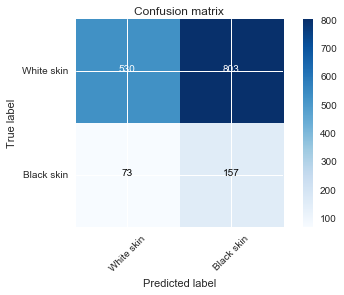

Silhouette score:  0.522060213405
Accuracy:  0.439539347409
F1 score:  0.263865546218


In [94]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score
from sklearn.metrics import f1_score

conf_mat = confusion_matrix(Y_true, Y_pred)
silhouette = silhouette_score(X_scaled, Y_pred)

plot_helpers.custom_confusion_matrix(conf_mat, classes=['White skin', 'Black skin'],
                      title='Confusion matrix')

plt.show()
print("Silhouette score: ", silhouette)
print("Accuracy: ", (conf_mat[0,0] + conf_mat[1,1]) / (conf_mat[0,0] + conf_mat[1,1] + conf_mat[0,1] + conf_mat[1,0]))
print("F1 score: ", f1_score(Y_true, Y_pred))

Let's try to drop features in order which seems to be the most resonable - where we believe two disjoint clusters are easy to find. 

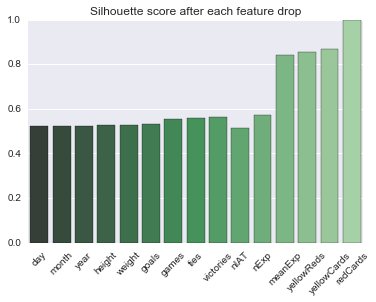

Confusion matrix, without normalization
[[1277   56]
 [ 201   29]]


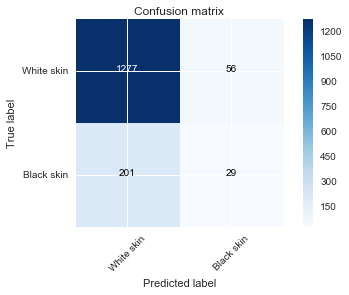

Accuracy:  0.835572616763
F1 score:  0.184126984127


In [95]:
X = X_copy
#Drop all features below = leave 'defeats' feature
to_drop = ['day', 'month', 'year', 'height', 'weight', 'goals', 'games', 'ties', 'victories', 'nIAT', 'nExp', 'meanExp', 'yellowReds', 'yellowCards', 'redCards']
silhouettes = []
for drop_column in to_drop:
    
    X = X.drop([drop_column], axis=1)
    X_scaled =  preprocessing.scale(X, axis=1)

    kmeans = KMeans(n_clusters=2, random_state=0, n_jobs=-2, init='k-means++').fit(X_scaled)
    Y_pred = kmeans.labels_

    conf_mat = confusion_matrix(Y_true, Y_pred)
    silhouette = silhouette_score(X_scaled, Y_pred)
    silhouettes.append(silhouette)
    
plt.title('Silhouette score after each feature drop')
silhouettes_plt = sns.barplot(x=to_drop, y=silhouettes, palette="Greens_d")
plt.setp(silhouettes_plt.get_xticklabels(), rotation=45)
plt.show()

plot_helpers.custom_confusion_matrix(conf_mat, classes=['White skin', 'Black skin'],
                      title='Confusion matrix')

plt.show()
print("Accuracy: ", (conf_mat[0,0] + conf_mat[1,1]) / (conf_mat[0,0] + conf_mat[1,1] + conf_mat[0,1] + conf_mat[1,0]))
print("F1 score: ", f1_score(Y_true, Y_pred))

As we can see creating two distinct clusters with high silhouette score is not a problem if distincitve feature is selected and quite suprisingly it achieves high accuracy. However this is simply due to the fact that majority of the players are white. Moreover it is worth noting that F1 measure/score is very low which means that although two distinct clusters where achieved, they are not race based (whites and blacks are mixed in both clusters, not blacks in one and whites in other). 

In order to check if two distinct clusters for which players with dark and light skin colors belong to different clusters can be achieved, we brute forced calculations to find what is the best feature dropping order for which Silhouette score and F1 score is highest:
```
n_iters = 100
best_silhouette = 0.0
best_f1 = 0.0
best_drop_order = []
to_drop_list = []
Y_pred_best
for i in range(n_iters):
 
    to_drop = ['day', 'month', 'year', 'height', 'weight', 'goals', 'games','nIAT', 'nExp', 'meanExp','ties', 'yellowReds', 'yellowCards', 'redCards','defeats', 'victories',]
    np.random.shuffle(to_drop)
    to_drop = to_drop[:-1]
    X = X_copy
    
    print("Iteration: ", i)
    to_drop_list.append(to_drop)

    for drop_column in to_drop:
        X = X.drop([drop_column], axis=1)
        X_scaled =  preprocessing.scale(X, axis=1)
        kmeans = KMeans(n_clusters=2, random_state=0, n_jobs=-2, init='k-means++').fit(X_scaled)
        Y_pred = kmeans.labels_

        conf_mat = confusion_matrix(Y_true, Y_pred)
        accuracy = (conf_mat[0,0] + conf_mat[1,1]) / (conf_mat[0,0] + conf_mat[1,1] + conf_mat[0,1] + conf_mat[1,0])
        silhouette = silhouette_score(X_scaled, Y_pred)
        f1 = f1_score(Y_true, Y_pred)

        
        if ((silhouette > best_silhouette) and (f1 > best_f1)):
            best_silhouette = silhouette
            best_drop_order = to_drop
            best_f1 = f1
            
            print("Silhouette score: ", silhouette)
            print("Accuracy: ", accuracy)
            print("f1: ", f1)

```
in order to find out that:

In [96]:
best_drop_order = ['victories',
 'goals',
 'defeats',
 'redCards',
 'day',
 'month',
 'meanExp',
 'year',
 'yellowCards',
 'ties',
 'yellowReds',
 'height',
 'nExp',
 'nIAT',
 'weight']

Which means only one feature is left out:

In [97]:
to_drop = ['day', 'month','height', 'weight', 'goals','nIAT', 'nExp', 'meanExp','ties', 'yellowReds', 'yellowCards', 'defeats', 'year', 'games', 'victories', 'redCards']
left_feature = list(set(to_drop) - set(best_drop_order))
left_feature

['games']

Let's re-cluster for this best drop order and print some metrics.

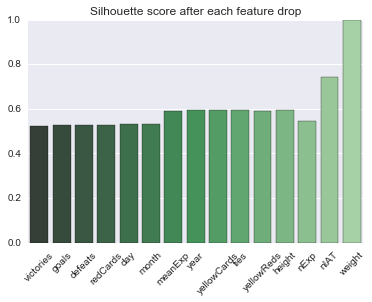

Confusion matrix, without normalization
[[1194  139]
 [ 171   59]]


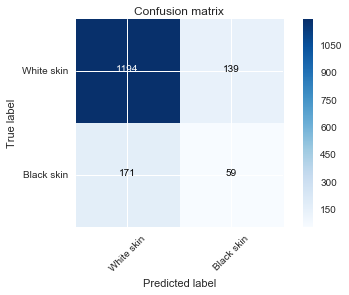

Accuracy:  0.80166346769
F1 score:  0.275700934579


In [98]:
X = X_copy
silhouettes = []
for drop_column in best_drop_order:
    X = X.drop([drop_column], axis=1)
    X_scaled =  preprocessing.scale(X, axis=1)
    kmeans = KMeans(n_clusters=2, random_state=0, n_jobs=-2, init='k-means++').fit(X_scaled)
    Y_pred = kmeans.labels_

    conf_mat = confusion_matrix(Y_true, Y_pred)
    silhouette = silhouette_score(X_scaled, Y_pred)
    silhouettes.append(silhouette)
    
plt.title('Silhouette score after each feature drop')
silhouettes_plt = sns.barplot(x=best_drop_order, y=silhouettes, palette="Greens_d")
plt.setp(silhouettes_plt.get_xticklabels(), rotation=45)
plt.show()

plot_helpers.custom_confusion_matrix(conf_mat, classes=['White skin', 'Black skin'],
                      title='Confusion matrix')

plt.show()
print("Accuracy: ", (conf_mat[0,0] + conf_mat[1,1]) / (conf_mat[0,0] + conf_mat[1,1] + conf_mat[0,1] + conf_mat[1,0]))
print("F1 score: ", f1_score(Y_true, Y_pred))

Low F1 score speaks for itself.
This result upholds our previous thoughts and assumptions - there is no way of creating two distinct clusters where players with dark and light skin colors belong to different clusters. We can easily clusterize players such that silhouette score is high but this result is not skin color dependent. 

Ufff...! We are glad that when it comes to sports racism is not a thing! :)